In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

c:\Users\Administrator\anaconda3\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [4]:
train_path_data = r"/content/drive/MyDrive/Final_data/train/train"
val_path_data   = r"/content/drive/MyDrive/Final_data/val/val"


In [5]:
import os
import re
import pandas as pd

def natural_sort_key(text):
    """Sort strings in human/natural order (numbers in order)."""
    return [int(c) if c.isdigit() else c for c in re.split(r'(\d+)', text)]

def generate_vggface_df(dir, limit_per_class=None):
    image_path = []
    image_label = []

    # Each folder inside dir is a label
    for label in sorted(os.listdir(dir), key=natural_sort_key):  # ترتيب الفولدرات طبيعي
        label_path = os.path.join(dir, label)

        # Only process folders
        if not os.path.isdir(label_path):
            continue

        images = os.listdir(label_path)

        # ترتيب الصور داخل كل فولدر طبيعي
        images = sorted(images, key=natural_sort_key)

        # Apply limit
        if limit_per_class is not None:
            images = images[:limit_per_class]

        for image in images:
            curr_path = os.path.join(label_path, image)

            # Only add actual images
            if not os.path.isfile(curr_path):
                continue

            image_path.append(curr_path)
            image_label.append(label)

    return pd.DataFrame(list(zip(image_path, image_label)), columns=['image_path', 'label'])


In [8]:
import os
import pandas as pd

BASE = r"C:\Users\Administrator\Desktop\Project AI Skills"

def resolve_nested(base, name):
    p1 = os.path.join(base, name)          # ...\train
    p2 = os.path.join(base, name, name)    # ...\train\train
    if os.path.isdir(p2):
        return p2
    if os.path.isdir(p1):
        return p1
    raise FileNotFoundError(f"Folder not found: {p1} or {p2}")

train_path_data = resolve_nested(BASE, "train")
val_path_data   = resolve_nested(BASE, "val")

print("train_path_data =", train_path_data)
print("val_path_data   =", val_path_data)

train_df = generate_vggface_df(train_path_data, limit_per_class=50)
val_df   = generate_vggface_df(val_path_data,   limit_per_class=50)

# mapping واحد ثابت (مهم)
all_labels = sorted(pd.concat([train_df['label'], val_df['label']]).unique())
class_idx  = {label: i for i, label in enumerate(all_labels)}

train_df['label_'] = train_df['label'].map(class_idx)
val_df['label_']   = val_df['label'].map(class_idx)

all_df = pd.concat([train_df, val_df], ignore_index=True).reset_index(drop=True)

all_df


train_path_data = C:\Users\Administrator\Desktop\Project AI Skills\train\train
val_path_data   = C:\Users\Administrator\Desktop\Project AI Skills\val\val


,image_path,label,label_
0,C:\Users\Administrator\Desktop\Project AI Skil...,1Mohmad-Ayman-Suleiman,0
1,C:\Users\Administrator\Desktop\Project AI Skil...,1Mohmad-Ayman-Suleiman,0
2,C:\Users\Administrator\Desktop\Project AI Skil...,1Mohmad-Ayman-Suleiman,0
3,C:\Users\Administrator\Desktop\Project AI Skil...,1Mohmad-Ayman-Suleiman,0
4,C:\Users\Administrator\Desktop\Project AI Skil...,1Mohmad-Ayman-Suleiman,0
...,...,...,...
11495,C:\Users\Administrator\Desktop\Project AI Skil...,n001296,229
11496,C:\Users\Administrator\Desktop\Project AI Skil...,n001296,229
11497,C:\Users\Administrator\Desktop\Project AI Skil...,n001296,229
11498,C:\Users\Administrator\Desktop\Project AI Skil...,n001296,229


In [9]:
len(train_df)

8500

In [10]:
import os
print(os.listdir(val_path_data))


['n000001', 'n000009', 'n000029', 'n000040', 'n000078', 'n000082', 'n000106', 'n000129', 'n000148', 'n000149', 'n000178', 'n000259', 'n000284', 'n000363', 'n000394', 'n000410', 'n000452', 'n000480', 'n000527', 'n000596', 'n000624', 'n000654', 'n000658', 'n000659', 'n000667', 'n000689', 'n000706', 'n000736', 'n000740', 'n000746', 'n000774', 'n000775', 'n000785', 'n000836', 'n000838', 'n000854', 'n000912', 'n000928', 'n000945', 'n000950', 'n000958', 'n000998', 'n001021', 'n001059', 'n001125', 'n001127', 'n001146', 'n001153', 'n001156', 'n001174', 'n001190', 'n001197', 'n001199', 'n001211', 'n001242', 'n001256', 'n001277', 'n001291', 'n001293', 'n001296']


In [11]:
import os
print(os.listdir(train_path_data))


['1Mohmad-Ayman-Suleiman', 'Mohamed_eissa', 'n000003', 'n000004', 'n000006', 'n000008', 'n000010', 'n000019', 'n000026', 'n000028', 'n000030', 'n000034', 'n000037', 'n000038', 'n000043', 'n000047', 'n000052', 'n000054', 'n000055', 'n000056', 'n000063', 'n000065', 'n000067', 'n000069', 'n000071', 'n000075', 'n000077', 'n000079', 'n000083', 'n000090', 'n000091', 'n000092', 'n000093', 'n000094', 'n000103', 'n000107', 'n000108', 'n000114', 'n000115', 'n000116', 'n000117', 'n000118', 'n000120', 'n000122', 'n000135', 'n000141', 'n000150', 'n000151', 'n000155', 'n000160', 'n000161', 'n000163', 'n000167', 'n000168', 'n000169', 'n000171', 'n000174', 'n000175', 'n000177', 'n000179', 'n000181', 'n000187', 'n000188', 'n000189', 'n000190', 'n000192', 'n000201', 'n000203', 'n000206', 'n000207', 'n000210', 'n000212', 'n000216', 'n000218', 'n000219', 'n000220', 'n000221', 'n000222', 'n000229', 'n000233', 'n000234', 'n000235', 'n000239', 'n000240', 'n000246', 'n000251', 'n000254', 'n000256', 'n000257',

In [12]:
MAX_CLASSES = 50  # You can change this value to control the number of classes

unique_labels = train_df['label'].unique()
selected_labels = unique_labels[:MAX_CLASSES]

train_df = train_df[train_df['label'].isin(selected_labels)].reset_index(drop=True)

print(f"Train DataFrame now contains data for {len(selected_labels)} classes.")

Train DataFrame now contains data for 50 classes.


In [13]:
class_name = train_df["label"].to_list()
print(train_df["label"].unique())

['1Mohmad-Ayman-Suleiman' 'Mohamed_eissa' 'n000003' 'n000004' 'n000006'
 'n000008' 'n000010' 'n000019' 'n000026' 'n000028' 'n000030' 'n000034'
 'n000037' 'n000038' 'n000043' 'n000047' 'n000052' 'n000054' 'n000055'
 'n000056' 'n000063' 'n000065' 'n000067' 'n000069' 'n000071' 'n000075'
 'n000077' 'n000079' 'n000083' 'n000090' 'n000091' 'n000092' 'n000093'
 'n000094' 'n000103' 'n000107' 'n000108' 'n000114' 'n000115' 'n000116'
 'n000117' 'n000118' 'n000120' 'n000122' 'n000135' 'n000141' 'n000150'
 'n000151' 'n000155' 'n000160']


In [14]:
len(train_df.label.unique())

50

In [15]:
len(train_df)

2500

In [16]:
class_idx = {}
for i, label in enumerate(sorted(train_df['label'].unique())):
    class_idx[label] = i

In [17]:
train_df['label_'] = train_df['label'].map(class_idx)

In [18]:
train_df.to_csv("vggfave_train.csv")

In [19]:
train_df

,image_path,label,label_
0,C:\Users\Administrator\Desktop\Project AI Skil...,1Mohmad-Ayman-Suleiman,0
1,C:\Users\Administrator\Desktop\Project AI Skil...,1Mohmad-Ayman-Suleiman,0
2,C:\Users\Administrator\Desktop\Project AI Skil...,1Mohmad-Ayman-Suleiman,0
3,C:\Users\Administrator\Desktop\Project AI Skil...,1Mohmad-Ayman-Suleiman,0
4,C:\Users\Administrator\Desktop\Project AI Skil...,1Mohmad-Ayman-Suleiman,0
...,...,...,...
2495,C:\Users\Administrator\Desktop\Project AI Skil...,n000160,49
2496,C:\Users\Administrator\Desktop\Project AI Skil...,n000160,49
2497,C:\Users\Administrator\Desktop\Project AI Skil...,n000160,49
2498,C:\Users\Administrator\Desktop\Project AI Skil...,n000160,49


In [19]:
import json

# بعد ما تعمل training
idx_to_label = dict(zip(train_df["label_"], train_df["label"]))

# حفظه في ملف
with open("class_mapping.json", "w") as f:
    json.dump(idx_to_label, f)

In [20]:
len(train_df)

2500

In [21]:
target = "/content/data2/data2/train/1/IMG-20240720-WA0006.jpg"

if target in train_df["image_path"].values:
    print("الصورة موجودة")
else:
    print("الصورة غير موجودة")


الصورة غير موجودة


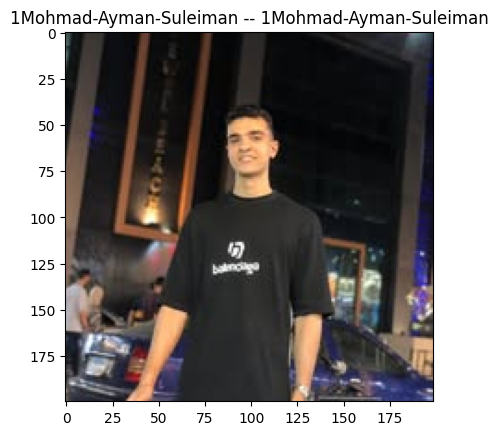

In [22]:
image = cv2.imread(train_df['image_path'][1])
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title(f"{train_df['label'][1]} -- {train_df['label'][1]}")
plt.imshow(image_rgb)
plt.show()

In [23]:
number_class=train_df.num_classes = train_df['label_'].nunique()

In [24]:
IMAGE_SIZE = (299, 299)
BATCH_SIZE = 64
EPOCHS = 45

` 32 batch size `
` shape = (299, 299, 3)`

In [25]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299,299,3))

for layer in base_model.layers:
    layer.trainable = False


x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
output_layer = Dense(number_class, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=output_layer)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [26]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),#0.0001
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 299, 299,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 149, 149,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 149, 149,  │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 149, 149,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 147, 147,  │      9,216 │ activation[0][0]  │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 147, 147,  │     18,432 │ activation_1[0][… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 147, 147,  │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, 147, 147,  │          0 │ batch_normalizat… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 73, 73,    │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 73, 73,    │      5,120 │ max_pooling2d[0]… │
│                     │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 73, 73,    │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, 73, 73,    │          0 │ batch_normalizat… │
│ (Activation)        │ 80)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 71, 71,    │    138,240 │ activation_3[0][… │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 71, 71,    │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, 71, 71,    │          0 │ batch_normalizat

 Total params: 23,952,210 (91.37 MB)

 Trainable params: 2,149,426 (8.20 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [27]:
print(train_df['label_'].unique())
print(len(train_df['label_'].unique()))


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
50


(np.float64(-0.5), np.float64(268.5), np.float64(299.5), np.float64(-0.5))

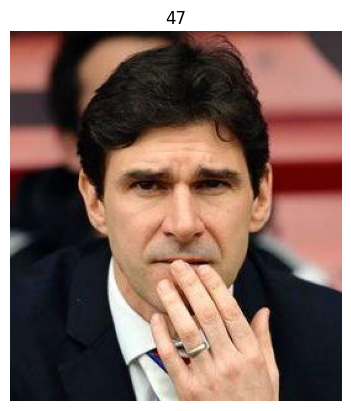

In [28]:
import matplotlib.pyplot as plt
import random

idx = random.randint(0, len(train_df)-1)
img = plt.imread(train_df.iloc[idx]['image_path'])
plt.imshow(img)
plt.title(train_df.iloc[idx]['label_'])
plt.axis('off')


In [ ]:
from sklearn.model_selection import train_test_split

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10,
    height_shift_range=0.10,
    zoom_range=0.15,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    rescale=1./255
)

# For validation data, typically only rescaling is needed, no augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

# Split the combined train_df into training and validation sets
# Using stratify ensures that each class is represented proportionally in both sets
train_df_split, val_df_split = train_test_split(
    train_df,
    test_size=0.2, # 20% for validation
    stratify=train_df['label_'],
    random_state=42
)

print(f"Training set size: {len(train_df_split)} images")
print(f"Validation set size: {len(val_df_split)} images")

# Convert label_ column to string type as required by flow_from_dataframe for sparse class_mode
train_df_split['label_'] = train_df_split['label_'].astype(str)
val_df_split['label_'] = val_df_split['label_'].astype(str)

train_generator = datagen.flow_from_dataframe(
    dataframe=train_df_split,
    x_col='image_path',
    y_col='label_',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=True
)

validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df_split,
    x_col='image_path',
    y_col='label_',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    shuffle=False # No need to shuffle validation data
)


history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=validation_generator # Pass validation generator here
)

Training set size: 2000 images
Validation set size: 500 images
Found 1997 validated image filenames belonging to 50 classes.
Found 499 validated image filenames belonging to 50 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 3 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/45
 5/32 ━━━━━━━━━━━━━━━━━━━━ 19:32 43s/step - accuracy: 0.0122 - loss: 4.1072

In [ ]:
def predict_top_k(image_path, model, class_idx, k=3):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    import numpy as np

    # تحميل الصورة وحجمها المناسب
    img = load_img(image_path, target_size=IMAGE_SIZE)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # لو استخدمت rescale أثناء التدريب
    img_array = np.expand_dims(img_array, axis=0)  # batch 1

    # التنبؤ
    pred = model.predict(img_array)[0]  # [0] للحصول على array من الاحتمالات

    # الحصول على top-k indices
    top_indices = pred.argsort()[-k:][::-1]

    # تحويل الرقم لاسم الفئة
    inv_class_idx = {v:k for k,v in class_idx.items()}

    # تجهيز قائمة النتائج
    top_predictions = [(inv_class_idx[i], pred[i]) for i in top_indices]

    return top_predictions


In [ ]:
image_path = "/content/WhatsApp Image 2025-12-09 at 2.00.36 PM.jpeg"
top_preds = predict_top_k(image_path, model, class_idx, k=3)

print("Top 3 predictions with probabilities:")
for label, prob in top_preds:
    print(f"{label}: {prob*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Top 3 predictions with probabilities:
1Mohmad-Ayman-Suleiman: 24.27%
n000043: 17.86%
n000151: 11.59%


In [ ]:
# حفظ الموديل بالكامل في ملف واحد
model.save('Shouk_model_V1_c50_s50_ac72.h5')


In [20]:
#mennaaaaa
import os
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ====== EDIT THESE ======
MODEL_PATH = r"C:\Users\Administrator\Desktop\Project AI Skills\meena_V1_c50_s50_acc93.h5"
TEST_DIR   = r"C:\Users\Administrator\Desktop\Project AI Skills\test_50_last20"
BATCH_SIZE = 32
# ========================

# 1) Load model (NO TRAINING)
model = tf.keras.models.load_model(MODEL_PATH, compile=False)
print("Loaded model ✅")
print("Model input :", model.input_shape)
print("Model output:", model.output_shape)

# 2) Infer input size
_, H, W, C = model.input_shape

# 3) Build test dataset (NO shuffle)
test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    labels="inferred",
    label_mode="int",
    image_size=(H, W),
    batch_size=BATCH_SIZE,
    shuffle=False
)

class_names = test_ds.class_names
num_classes = len(class_names)
print("Found", sum(1 for _ in test_ds.unbatch()), "images belonging to", num_classes, "classes.")

# 4) IMPORTANT: normalization
# لو مش متأكد الموديل اتدرّب على اي preprocessing، جرّب الاتنين:
# A) تقسيم على 255 (الأكثر شيوعًا)
test_ds_norm = test_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))

# 5) Predict
y_true = np.concatenate([y.numpy() for _, y in test_ds_norm], axis=0)
y_prob = model.predict(test_ds_norm, verbose=1)
y_pred = np.argmax(y_prob, axis=1)

# 6) Metrics
acc = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print("\nAccuracy:", acc)
print("Confusion matrix shape:", cm.shape)
print("\nClassification Report (macro avg مهم):")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4, zero_division=0))


Loaded model ✅
Model input : (None, 224, 224, 3)
Model output: (None, 50)
Found 999 files belonging to 50 classes.
Found 999 images belonging to 50 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 844s 26s/step

Accuracy: 0.025025025025025027
Confusion matrix shape: (50, 50)

Classification Report (macro avg مهم):
                        precision    recall  f1-score   support

1Mohmad-Ayman-Suleiman     0.5000    0.1053    0.1739        19
         Mohamed_eissa     0.0000    0.0000    0.0000        20
               n000003     0.0000    0.0000    0.0000        20
               n000004     0.0000    0.0000    0.0000        20
               n000006     0.0000    0.0000    0.0000        20
               n000008     0.0000    0.0000    0.0000        20
               n000010     0.0000    0.0000    0.0000        20
               n000019     0.0000    0.0000    0.0000        20
               n000026     0.0000    0.0000    0.0000        20
               n000028     0.0177    0.2000    0.0325   

In [ ]:
# essa
import os
import torch
import numpy as np
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ====== EDIT THESE ======
PT_PATH  = r"C:\Users\Administrator\Desktop\Project AI Skills\FULL_Version1.pt"
TEST_DIR = r"C:\Users\Administrator\Desktop\Project AI Skills\test_50_last20"
BATCH_SIZE = 32
# ========================

device = torch.device("cpu")

# 1) Load model (NO TRAINING)
# WARNING: weights_only=False قد ينفّذ كود لو الملف مش موثوق — استخدمه فقط لو واثق من مصدر الملف.
model = torch.load(PT_PATH, map_location=device, weights_only=False)
model = model.to(device)
model.eval()

print("Loaded model ✅", type(model))

# 2) Transform (ResNet ImageNet normalization)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std =[0.229, 0.224, 0.225])
])

# 3) Dataset/Loader
test_ds = datasets.ImageFolder(TEST_DIR, transform=transform)
class_names = test_ds.classes
print("Num classes:", len(class_names))
print("Total test images:", len(test_ds))

loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# 4) Predict
y_true, y_pred = [], []

with torch.no_grad():
    for imgs, labels in loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        logits = model(imgs)
        preds = torch.argmax(logits, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())

# 5) Metrics
acc = accuracy_score(y_true, y_pred)
cm = confusion_matrix(y_true, y_pred)

print("\nAccuracy:", acc)
print("Confusion matrix shape:", cm.shape)
print("\nClassification Report (macro avg مهم):")
print(classification_report(y_true, y_pred, target_names=class_names, digits=4, zero_division=0))


In [21]:
import os

BASE_DIR = r"C:\Users\Administrator\Desktop\Project AI Skills"

# الداتا (زي ما ظهر عندك: train\train فيها 170 فولدر)
TRAIN_DIR = os.path.join(BASE_DIR, "train", "train")

# الموديلات
KERAS_MODEL_PATH  = os.path.join(BASE_DIR, "meena_V1_c50_s50_acc93.h5")
PYTORCH_MODEL_PATH = os.path.join(BASE_DIR, "FULL_Version1.pt")

# فولدر نتايج الإيفالويشن
OUTPUT_DIR = os.path.join(BASE_DIR, "final_evaluation")

print("BASE_DIR:", BASE_DIR)
print("TRAIN_DIR:", TRAIN_DIR, "exists?", os.path.exists(TRAIN_DIR))
print("KERAS_MODEL_PATH:", KERAS_MODEL_PATH, "exists?", os.path.exists(KERAS_MODEL_PATH))
print("PYTORCH_MODEL_PATH:", PYTORCH_MODEL_PATH, "exists?", os.path.exists(PYTORCH_MODEL_PATH))
print("OUTPUT_DIR:", OUTPUT_DIR)


BASE_DIR: C:\Users\Administrator\Desktop\Project AI Skills
TRAIN_DIR: C:\Users\Administrator\Desktop\Project AI Skills\train\train exists? True
KERAS_MODEL_PATH: C:\Users\Administrator\Desktop\Project AI Skills\meena_V1_c50_s50_acc93.h5 exists? True
PYTORCH_MODEL_PATH: C:\Users\Administrator\Desktop\Project AI Skills\FULL_Version1.pt exists? True
OUTPUT_DIR: C:\Users\Administrator\Desktop\Project AI Skills\final_evaluation


In [22]:
models_info = [
    {
        'name': 'Keras_meena_V1',
        'path': KERAS_MODEL_PATH,
        'type': 'keras'
    },
    {
        'name': 'PyTorch_FULL_Version1',
        'path': PYTORCH_MODEL_PATH,
        'type': 'pytorch'
    }
]

print(models_info)


[{'name': 'Keras_meena_V1', 'path': 'C:\\Users\\Administrator\\Desktop\\Project AI Skills\\meena_V1_c50_s50_acc93.h5', 'type': 'keras'}, {'name': 'PyTorch_FULL_Version1', 'path': 'C:\\Users\\Administrator\\Desktop\\Project AI Skills\\FULL_Version1.pt', 'type': 'pytorch'}]


In [23]:
# ✅ Fix printing model type in evaluate_pytorch_model (بدون مسح الدالة)
# ملاحظة: دي مش هتمسح حاجة، بس هتتجنب error في: type(model)._name_
pass


In [25]:
import os
import re
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

import tensorflow as tf
from tensorflow.keras.models import load_model

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


# ============================================
# 1. UTILITY FUNCTIONS
# ============================================

def natural_sort_key(text):
    return [int(c) if c.isdigit() else c for c in re.split(r'(\d+)', text)]


def create_test_set(train_dir, test_output_dir, n_test_images=20, max_classes=50):
    if os.path.exists(test_output_dir):
        shutil.rmtree(test_output_dir)
    os.makedirs(test_output_dir, exist_ok=True)

    all_classes = sorted(
        [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))],
        key=natural_sort_key
    )

    selected_classes = all_classes[:max_classes]

    copied, skipped = 0, 0

    for cls in selected_classes:
        src_cls = os.path.join(train_dir, cls)
        imgs = sorted(
            [f for f in os.listdir(src_cls) if os.path.isfile(os.path.join(src_cls, f))],
            key=natural_sort_key
        )

        if len(imgs) < n_test_images + 1:
            skipped += 1
            continue

        test_imgs = imgs[-n_test_images:]

        dst_cls = os.path.join(test_output_dir, cls)
        os.makedirs(dst_cls, exist_ok=True)

        for f in test_imgs:
            shutil.copy2(os.path.join(src_cls, f), os.path.join(dst_cls, f))
            copied += 1

    print(f"✅ Test set created: {copied} images | classes: {len(selected_classes)-skipped}")
    return selected_classes


# ============================================
# 2. METRICS
# ============================================

def calculate_metrics(y_true, y_pred, class_names):
    acc  = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average="macro", zero_division=0)
    rec  = recall_score(y_true, y_pred, average="macro", zero_division=0)
    f1   = f1_score(y_true, y_pred, average="macro", zero_division=0)

    cm = confusion_matrix(y_true, y_pred)

    print("\nAccuracy:", acc)
    print("Macro Precision:", prec)
    print("Macro Recall:", rec)
    print("Macro F1:", f1)
    print("Confusion Matrix shape:", cm.shape)

    print("\nClassification Report:")
    print(classification_report(
        y_true, y_pred, target_names=class_names, digits=4, zero_division=0
    ))

    return {
        "accuracy": acc,
        "precision": prec,
        "recall": rec,
        "f1": f1,
        "confusion_matrix": cm,
        "y_true": y_true,
        "y_pred": y_pred,
        "class_names": class_names
    }


# ============================================
# 3. KERAS EVALUATION
# ============================================

def evaluate_keras_model(model_path, test_dir, class_names):
    print("\nEvaluating Keras model:", os.path.basename(model_path))

    model = load_model(model_path, compile=False)
    _, H, W, _ = model.input_shape

    test_ds = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        labels="inferred",
        label_mode="int",
        class_names=class_names,
        image_size=(H, W),
        batch_size=32,
        shuffle=False
    )

    test_ds = test_ds.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))

    y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
    y_prob = model.predict(test_ds, verbose=1)
    y_pred = np.argmax(y_prob, axis=1)

    return calculate_metrics(y_true, y_pred, class_names)


# ============================================
# 4. PYTORCH EVALUATION
# ============================================

def evaluate_pytorch_model(model_path, test_dir, class_names, device="cpu"):
    print("\nEvaluating PyTorch model:", os.path.basename(model_path))

    model = torch.load(model_path, map_location=device, weights_only=False)
    model.eval()

    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )
    ])

    test_ds = datasets.ImageFolder(test_dir, transform=transform)

    loader = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=0)

    y_true, y_pred = [], []

    with torch.no_grad():
        for imgs, labels in loader:
            logits = model(imgs)
            preds = torch.argmax(logits, dim=1)
            y_true.extend(labels.numpy())
            y_pred.extend(preds.numpy())

    return calculate_metrics(np.array(y_true), np.array(y_pred), class_names)


# ============================================
# 5. MAIN PIPELINE
# ============================================

def run_complete_evaluation(train_dir, models_info, output_dir="evaluation_results"):
    os.makedirs(output_dir, exist_ok=True)

    test_dir = os.path.join(output_dir, "test_set")
    class_names = create_test_set(train_dir, test_dir, n_test_images=20, max_classes=50)

    all_results = {}

    for m in models_info:
        if m["type"] == "keras":
            res = evaluate_keras_model(m["path"], test_dir, class_names)
        elif m["type"] == "pytorch":
            res = evaluate_pytorch_model(m["path"], test_dir, class_names)
        else:
            continue

        all_results[m["name"]] = res

    print("\n✅ Evaluation finished")
    return all_results


In [26]:
results = run_complete_evaluation(
    train_dir=TRAIN_DIR,
    models_info=models_info,
    output_dir=OUTPUT_DIR
)


✅ Test set created: 1000 images | classes: 50

Evaluating Keras model: meena_V1_c50_s50_acc93.h5
Found 999 files belonging to 50 classes.
32/32 ━━━━━━━━━━━━━━━━━━━━ 628s 19s/step

Accuracy: 0.025025025025025027
Macro Precision: 0.012587436004013351
Macro Recall: 0.025105263157894738
Macro F1: 0.007599652140016178
Confusion Matrix shape: (50, 50)

Classification Report:
                        precision    recall  f1-score   support

1Mohmad-Ayman-Suleiman     0.5000    0.1053    0.1739        19
         Mohamed_eissa     0.0000    0.0000    0.0000        20
               n000003     0.0000    0.0000    0.0000        20
               n000004     0.0000    0.0000    0.0000        20
               n000006     0.0000    0.0000    0.0000        20
               n000008     0.0000    0.0000    0.0000        20
               n000010     0.0000    0.0000    0.0000        20
               n000019     0.0000    0.0000    0.0000        20
               n000026     0.0000    0.0000    0.00

In [27]:
for name, r in results.items():
    print("\n", "="*50)
    print("Model:", name)
    print("Accuracy:", r["accuracy"])
    print("Macro Precision:", r["precision"])
    print("Macro Recall:", r["recall"])
    print("Macro F1:", r["f1"])



Model: Keras_meena_V1
Accuracy: 0.025025025025025027
Macro Precision: 0.012587436004013351
Macro Recall: 0.025105263157894738
Macro F1: 0.007599652140016178

Model: PyTorch_FULL_Version1
Accuracy: 0.012012012012012012
Macro Precision: 0.013925100613181108
Macro Recall: 0.012
Macro F1: 0.012678068659171487
